# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### Question 1 - Is the data normal?

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline 

In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


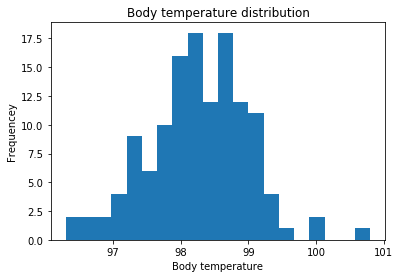

In [12]:
plt.hist(df.temperature, bins=20)
plt.title("Body temperature distribution")
plt.xlabel("Body temperature")
plt.ylabel("Frequencey")
plt.show()

Visually it's difficult to tell if the data is normally distributed, it looks like the data has a positive skew. However a visual inspection is insuficient to determine if the distribution is normal, thus we will use SciPy's normaltest. The function uses D'Agostino's K-squared test, it returns a test statistic which is equal to:

$s^2 + k^2$

Where s is the z-score of the skew test and, k is the z-score of the kurtosis test, it also returns the p-value of the test. We assume the null hypothesis that our data came from a normal distribution. Thus if the p-value is smaller that a threshold value (we will use 0.05), we can infer that the data did not come come from a normal distribution

In [14]:
stats.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since our p-value is larger than 0.05, we fail to reject the null hypotheses and infer that the data came from a normal distribution

### Question 2 - Is the samle large, and independent?

Let's start by counting the observations

In [15]:
print(len(df))

130


If we want to assume that our data is normally distributed, then 130 observations should be sufficient considering the most common rule of thumb is 30 observations. 

With regards to the second question of independence, one would assume that knowing the temperature of one person does not give us no information about the temperature of another person. Hence the observations are independent 

### Question 3 - Is the true population mean really 98.6 degrees F?

To determine this we will first estimate the standard error of the mean, the formula is:

$SE = S/N^(1/2)$

Where, S is the standard deviation of our sample, and N is the number of observations

In [29]:
S = np.std(df['temperature'])
N = len(df)
SE = S/(N**(1/2))
print(SE)

0.06405661469519336


We will now run a z-test, we assume the poupulation mean to be 98.6, the null hypothesis would assert that this assumption is true, while rejecting the null hypothesis would assert that the population mean is not 98.6. The formula for our Z-test is:

$Z = x - \mu M / SE$

In [26]:
z = (np.mean(df['temperature']) - 98.6) / SE
print(z)

-5.475925202078116


And finally we we compute the p value of our test statistic. Note that we don't care if the population mean is above or below our assumption, thus we use a two sided test

In [28]:
p = stats.norm.sf(abs(z))*2
print(p)

4.35231516588e-08


Since our p-value is so small we can comfortable accept the null hypothesis and infer that our population mean is 98.6

We will now use a t test to see if we come up with a similar result, for the sake of simplicity we will us the t-test function from the scipy libary

In [31]:
stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Once again, since our p-value is so small we can comfortable accept the null hypothesis and infer that our population mean is 98.6

### Question 4 - Draw a small sample of size 10 from the data and repeat both tests

In the case that we only have 10 samples, considering the variance of the pouplation is unknown, and we have less than 30 samples, I would be wary of using a Z-test to infer the population mean. However we are still able to use a t test.

In [34]:
# Draw ten random samples
ten_samples = df.sample(n=10)
# Run the T-test again
stats.ttest_1samp(ten_samples['temperature'],98.6)

Ttest_1sampResult(statistic=-1.6239958858822081, pvalue=0.13882378957899358)

From our p-value we can only be 86.12% (100-13.88) certain that the population mean is 98.6 degrees. Comparing the results from this t-test to the previous t-test we can see how increasing the number of samples increases the strength of our inferences. With 130 samples we can be 99.99% confident, where as when we only have ten observations this confidence level drops to only 86.12%

### Question 5 - At what temperature should we consider someone's temperature to be "abnormal"?

To answer this question we must compute our margin of error, the formula is as follows:

ME = SE x CV

Where SE is the standard error, and CV is th critical value. We have already estimated the SE in question three. For this test we will use a 95% confidence interval, thus our critical value is 1.96 since we are doing a two tailed test.

We will use the Scipy function norm.interval

In [36]:
alpha = .95
loc = df['temperature'].mean()
scale = S/np.sqrt(N)
stats.norm.interval(alpha,loc,scale)

(98.123682111456645, 98.37477942700491)

This gives us a confidence interval between the minimum and maximum temperatures which we would consider to be normal, inversly any temperatures which fall outside of that range said to be abnormal, with 95% confidence

### Question 6 - Is there a significant difference between males and females in normal temperature?

We start off by constructing two seperate Data Frames, for the male and female body temperatures

In [37]:
f_temp = df['temperature'][df.gender=='F']
m_temp = df['temperature'][df.gender=='M']

We then compute the number of samples in each Data Frame

In [39]:
print(len(f_temp))
print(len(m_temp))

65
65


It's nice that we have so many observations and that the number of samples is perfectly balanced. To test whether the there is a significant difference in female and male body temperature we will conduct a t-test. If the p-value of our test is  above 0.05 we will accept the null hypothesis, which assumes that there is no significant difference between the mean male and female body temperature. THe alternative hypothesis is that there is a statistically significant difference between the means

In [40]:
stats.ttest_ind(f_temp,m_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

Since the p-value is below our threshold of 0.05 we reject the null hypothesis in farour of the alternative hypothesis, meaning we assert that there is a difference between the mean female and male body temperature